#  1. Separate digit '3' data from train.csv file.

# 1.a. Store only 100 images randomly from the whole corpus.

In [2]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('/kaggle/input/numbers/train.csv')

# Filter the dataset for digit '3'
digit_3_df = df[df['label'] == 3]

# Randomly select 100 rows
if len(digit_3_df) > 100:
    sample_digit_3_df = digit_3_df.sample(n=100, random_state=42)
else:
    print("There are less than 100 images of digit '3'.")
    sample_digit_3_df = digit_3_df

# Save the filtered dataset to a new CSV file
sample_digit_3_df.to_csv('digit_3_images.csv', index=False)

print("Filtered data saved successfully.")


Filtered data saved successfully.


# Print file

In [4]:
import pandas as pd

# Specify the path to your CSV file
file_path = 'digit_3_images.csv'

# Read the CSV file
df = pd.read_csv(file_path)

# Print the DataFrame
print(df.head())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      3       0       0       0       0       0       0       0       0   
1      3       0       0       0       0       0       0       0       0   
2      3       0       0       0       0       0       0       0       0   
3      3       0       0       0       0       0       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

# 2. Visualize 10 randomly collected images from the data subset.

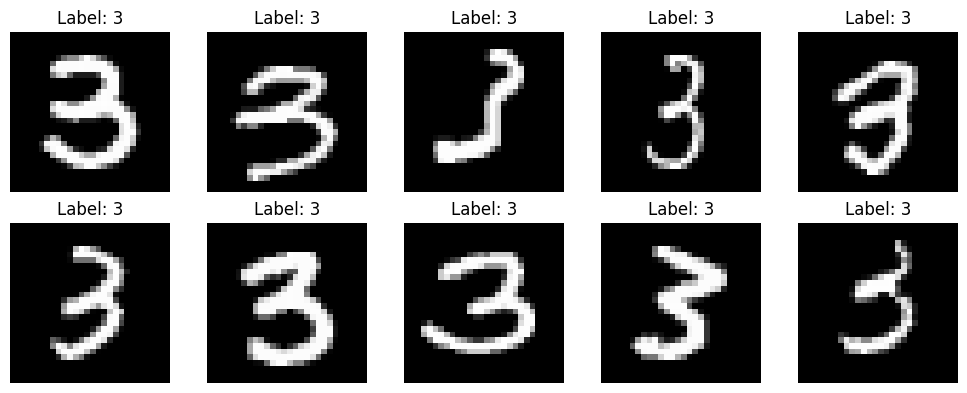

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the subset CSV file containing images of digit '3'
df = pd.read_csv('digit_3_images.csv')

# Select 10 random rows (images)
random_images = df.sample(n=10)

# Set up the figure size and grid
plt.figure(figsize=(10, 4))

# Loop through each of the 10 images
for index, row in enumerate(random_images.iterrows()):
    label = row[1]['label']
    pixels = row[1].drop('label').values.astype(np.uint8)
    
    # Reshape the pixels into the original 28x28 image size (assuming MNIST dataset format)
    image = pixels.reshape((28, 28))
    
    # Plot each image in a subplot
    plt.subplot(2, 5, index + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {label}')
    plt.axis('off')

plt.tight_layout()
plt.show()


# practice

In [15]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

def populate(N, i, nnarray, samples):
    synthetic = []
    neighbors = nnarray[i]
    for _ in range(N):
        nn = np.random.choice(neighbors)
        dif = samples[nn] - samples[i]
        gap = np.random.rand()
        synthetic_sample = samples[i] + gap * dif
        synthetic.append(synthetic_sample)
    return synthetic

def smote(T, N, k, samples):
    if N < 100:
        # If N is less than 100%, randomize the T, and then only populate N%
        T = T * N // 100
        N = 100

    N = N // 100  # The amount of SMOTE is assumed to be in integral multiples of 100.
    n_samples, n_attrs = samples.shape
    # Finding k-nearest neighbors for each sample
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(samples)
    nnarray = neigh.kneighbors(samples, return_distance=False)
    
    synthetic = []
    for i in range(T):
        # Populate N synthetic samples for each original sample
        synthetic += populate(N, i, nnarray, samples)
    
    return synthetic

# Example usage:
# Let's say we have a small dataset with 5 samples and 3 features
samples = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12], [13, 14, 15]])
T = samples.shape[0]  # Number of minority samples
N = 200  # Percentage of SMOTE
k = 2  # Number of nearest neighbors

synthetic_samples = smote(T, N, k, samples)
print(np.array(synthetic_samples))


[[ 1.          2.          3.        ]
 [ 1.4770812   2.4770812   3.4770812 ]
 [ 1.45215746  2.45215746  3.45215746]
 [ 4.          5.          6.        ]
 [ 7.          8.          9.        ]
 [ 7.          8.          9.        ]
 [10.         11.         12.        ]
 [ 9.21534654 10.21534654 11.21534654]
 [10.46775158 11.46775158 12.46775158]
 [13.         14.         15.        ]]


# 3. Write two functions. SMOTE , Populate as in Algorithm given below.

In [92]:
def compute_k_nearest_neighbors(Sample, i, k):
    distances = np.sum((Sample - Sample[i])**2, axis=1)  # Compute Euclidean distances
    nnarray = np.argsort(distances)[1:k+1]  # Sort distances and select k nearest neighbors (excluding the sample itself)
    return nnarray



def smot(N,k,sample):
    numattrs = sample.shape[1]  # Number of attributes/features=784
    T=len(sample)
    synthetic = np.zeros((N*T, numattrs))  # Array to store synthetic samples
    ImageReferences = np.zeros((N*T, 3), dtype=int)  # Array to store image references (source and destination)
    newindex = 0  # Counter for number of synthetic samples generated
    for i in range(T):
        nnarray=compute_k_nearest_neighbors(sample, i, k)
        newindex=populate(N,i,nnarray,sample,synthetic,ImageReferences,numattrs,newindex)
        
    return synthetic,ImageReferences
        
def populate(N,i,nnarray,sample,synthetic,ImageReferences,numattrs,newindex):
    
    while N!=0:
        nn = np.random.randint(0, len(nnarray))  # Choose a random nearest neighbor index
        diff=sample[nnarray[nn]] - sample[i]
        
        for attr in range(numattrs):
            gap=np.random.rand()
            synthetic[newindex][attr]=sample[i][attr] + gap * diff[attr]  # Generate synthetic sample
            
        # Store image references (source and destination)
        ImageReferences[newindex] = [i, nnarray[nn],newindex]
        newindex += 1
        N -= 1
    return newindex

#  4. You have to store image references for every synthetic image  generated. 

In [93]:
df = pd.read_csv('digit_3_images.csv')
digit_3 = df[df['label'] == 3].iloc[:10]
sample = np.array(digit_3.drop('label', axis=1))
N=2
k=5
synthetic, ImageReferences = smot(N, k,sample)
print(sample)
print(len(synthetic))
print(len(ImageReferences))

[2 5 3 7 1]
nn 1
nn 4
[9 2 3 0 5]
nn 3
nn 0
[0 3 7 1 5]
nn 0
nn 0
[2 0 8 9 1]
nn 2
nn 1
[0 8 5 2 1]
nn 0
nn 4
[0 2 9 7 1]
nn 4
nn 3
[8 3 4 0 5]
nn 0
nn 4
[2 0 9 3 5]
nn 3
nn 1
[6 3 2 0 4]
nn 2
nn 2
[1 3 7 5 2]
nn 3
nn 1
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
20
20


Producing synthetic images for sample  0  with nearest neighbors  5


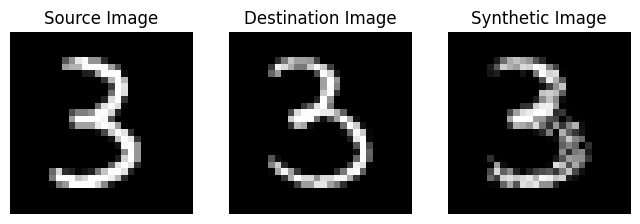

Producing synthetic images for sample  0  with nearest neighbors  1


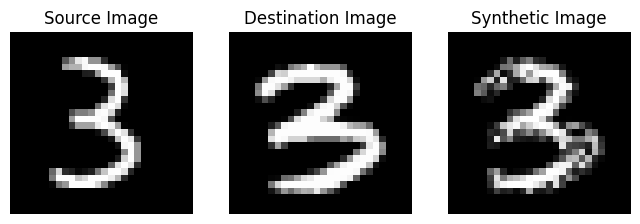

Producing synthetic images for sample  1  with nearest neighbors  0


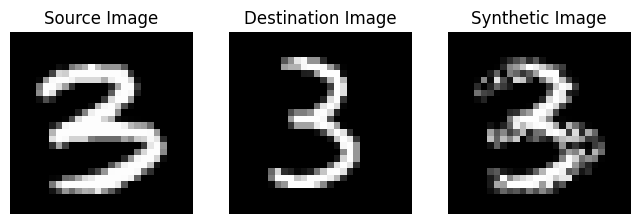

Producing synthetic images for sample  1  with nearest neighbors  9


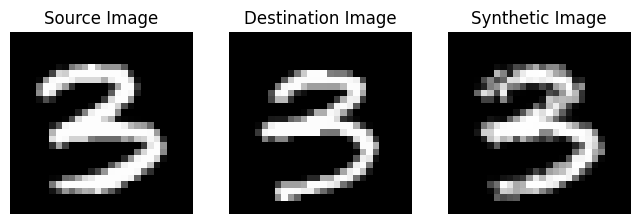

Producing synthetic images for sample  2  with nearest neighbors  0


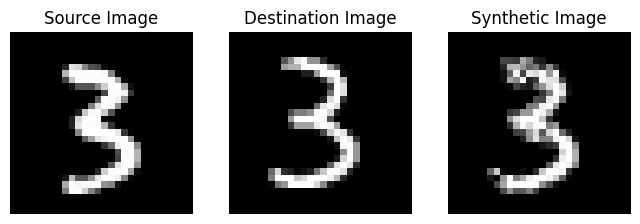

Producing synthetic images for sample  2  with nearest neighbors  0


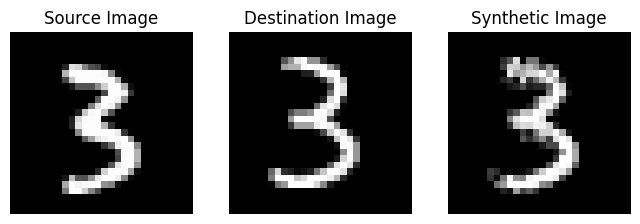

Producing synthetic images for sample  3  with nearest neighbors  8


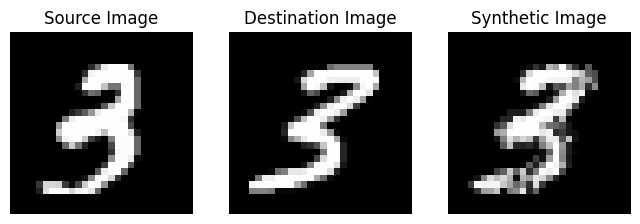

Producing synthetic images for sample  3  with nearest neighbors  0


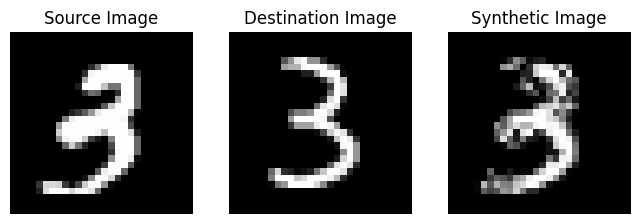

Producing synthetic images for sample  4  with nearest neighbors  0


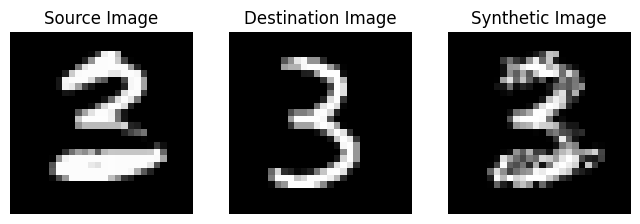

Producing synthetic images for sample  4  with nearest neighbors  1


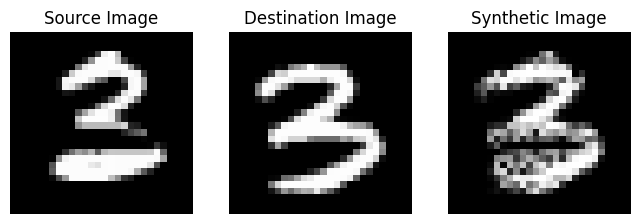

Producing synthetic images for sample  5  with nearest neighbors  1


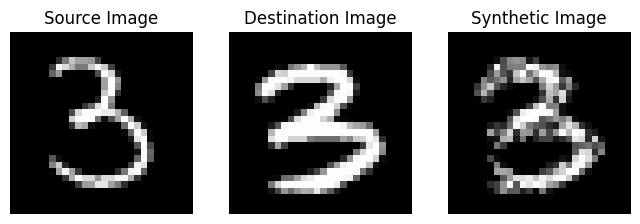

Producing synthetic images for sample  5  with nearest neighbors  7


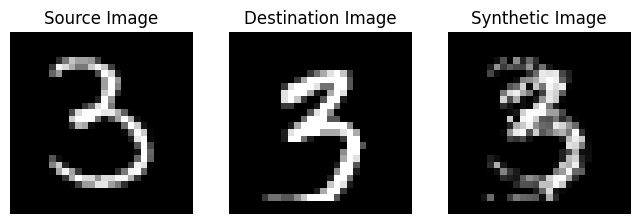

Producing synthetic images for sample  6  with nearest neighbors  8


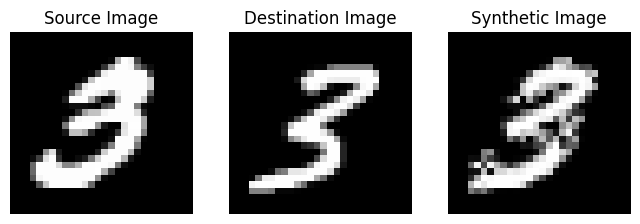

Producing synthetic images for sample  6  with nearest neighbors  5


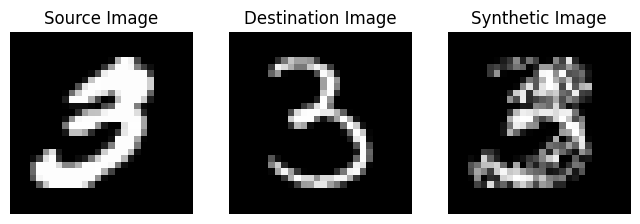

Producing synthetic images for sample  7  with nearest neighbors  3


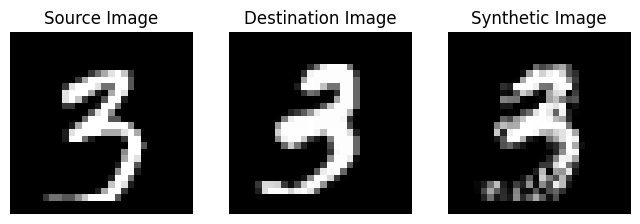

Producing synthetic images for sample  7  with nearest neighbors  0


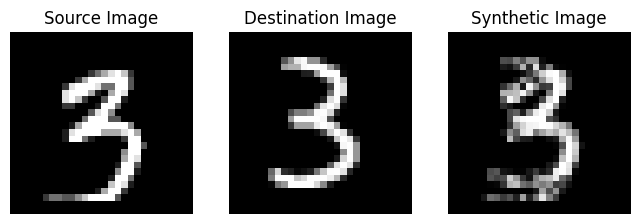

Producing synthetic images for sample  8  with nearest neighbors  2


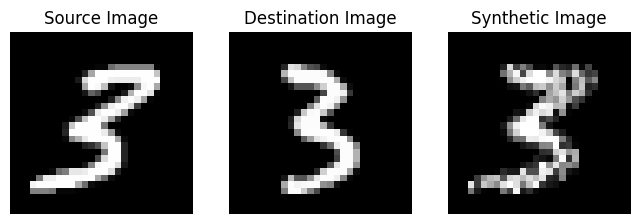

Producing synthetic images for sample  8  with nearest neighbors  2


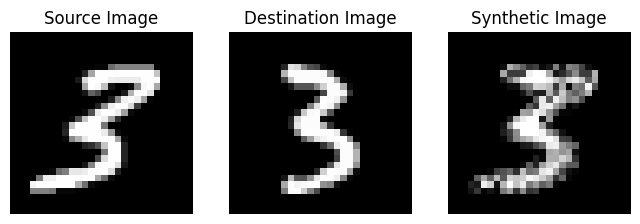

Producing synthetic images for sample  9  with nearest neighbors  5


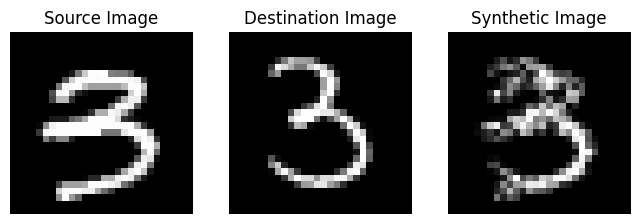

Producing synthetic images for sample  9  with nearest neighbors  3


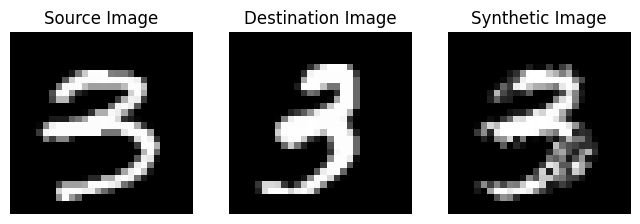

In [94]:
# Visualizing synthetic samples
import matplotlib.pyplot as plt

# Defining the number of synthetic samples to visualize
num_samples_to_visualize = 20

# Iterating over the number of samples to visualize
for i in range(num_samples_to_visualize):
    # Extracting the source index and destination index from ImageReferences
    source_index,neighbor_index, dest_index = ImageReferences[i]
    print ("Producing synthetic images for sample ", source_index, " with nearest neighbors ", neighbor_index)
    # Plotting the original minority class sample (source image)
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(sample[source_index].reshape(28, 28), cmap='gray')
    plt.title('Source Image')
    plt.axis('off')
    
    # Plotting the original minority class sample (Destination image)
    plt.subplot(1, 3, 2)
    plt.imshow(sample[neighbor_index].reshape(28, 28), cmap='gray')
    plt.title('Destination Image')
    plt.axis('off')
    
    # Plotting the synthetic sample (Synthetic image)
    plt.subplot(1, 3, 3)
    plt.imshow(synthetic[dest_index].reshape(28, 28), cmap='gray')
    plt.title('Synthetic Image')
    plt.axis('off')
    
    # Showing the plots
    plt.show()
